<a href="https://colab.research.google.com/github/Nerflix/KNN-and-Logistic-Regression-Ensemble-with-ADA-boost-Classifier/blob/main/Machine_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
from google.colab import files

# Upload the CSV file to Colab
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv('train.csv')

# Display the DataFrame
df

Saving train.csv to train (1).csv


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [ ]:
df['Type']=df['Type'].replace({'H': 1, 'L': 2, 'M': 3 })
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,2,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,3,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,2,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,3,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,3,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,1,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,2,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,2,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [ ]:
df1=df.drop('id', axis=1)
df2=df1
df1

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L50096,2,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,3,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,2,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,3,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,M22284,3,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,H38017,1,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,L54690,2,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,L53876,2,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


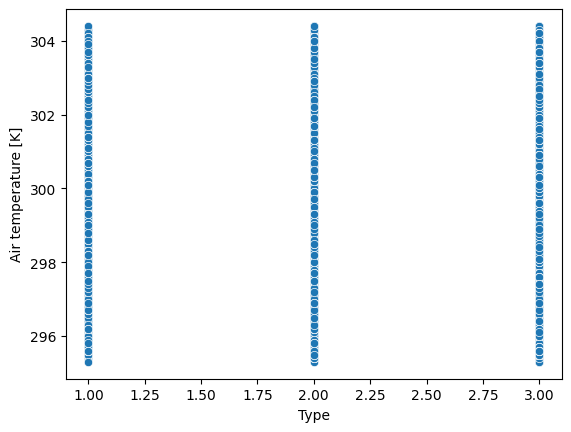

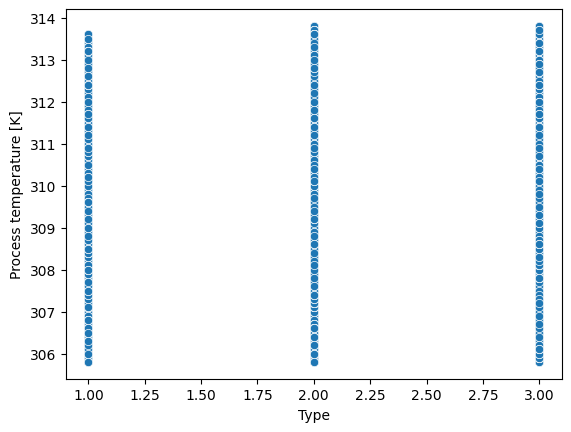

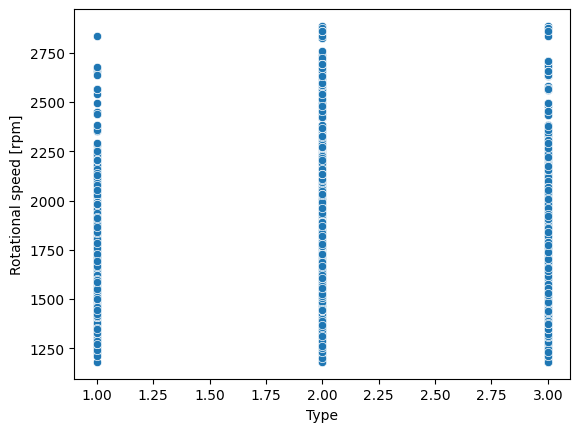

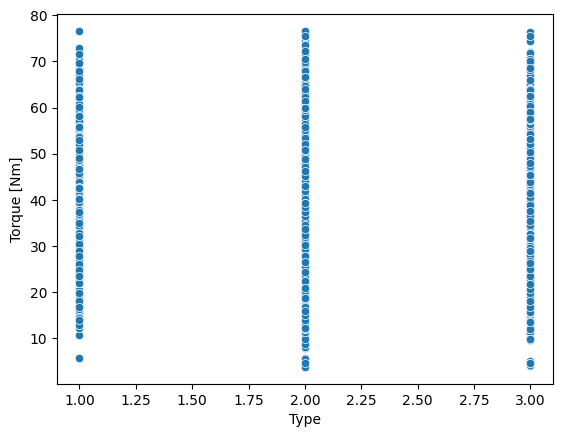

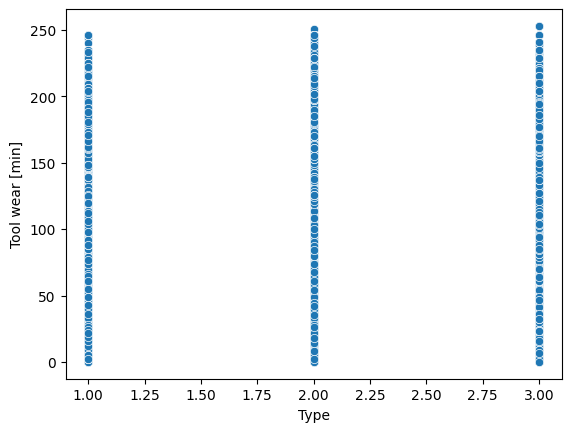

In [ ]:
sns.scatterplot(data=df1, x='Type', y='Air temperature [K]')
plt.show()

sns.scatterplot(data=df1, x='Type', y='Process temperature [K]')
plt.show()


sns.scatterplot(data=df1, x='Type', y='Rotational speed [rpm]')
plt.show()

sns.scatterplot(data=df1, x='Type', y='Torque [Nm]')
plt.show()

sns.scatterplot(data=df1, x='Type', y='Tool wear [min]')
plt.show()

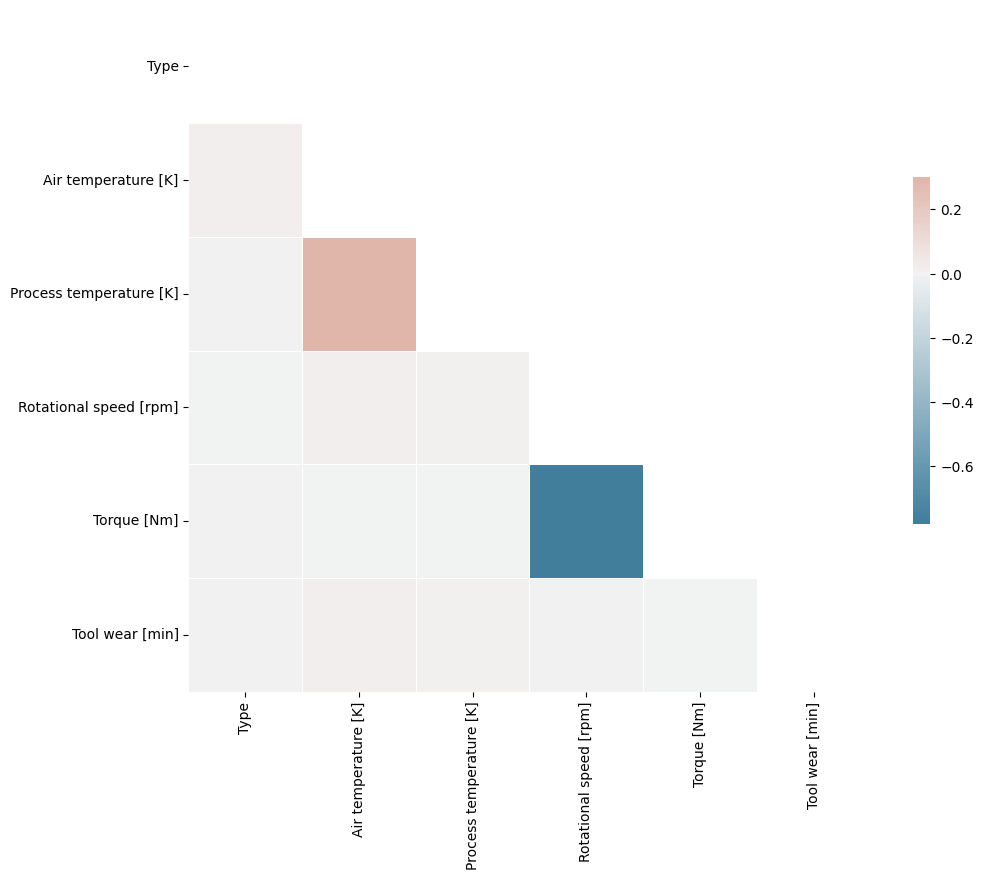

In [ ]:

# Select the columns to include in the correlation plot
cols = ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df1 = df1[cols]

# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


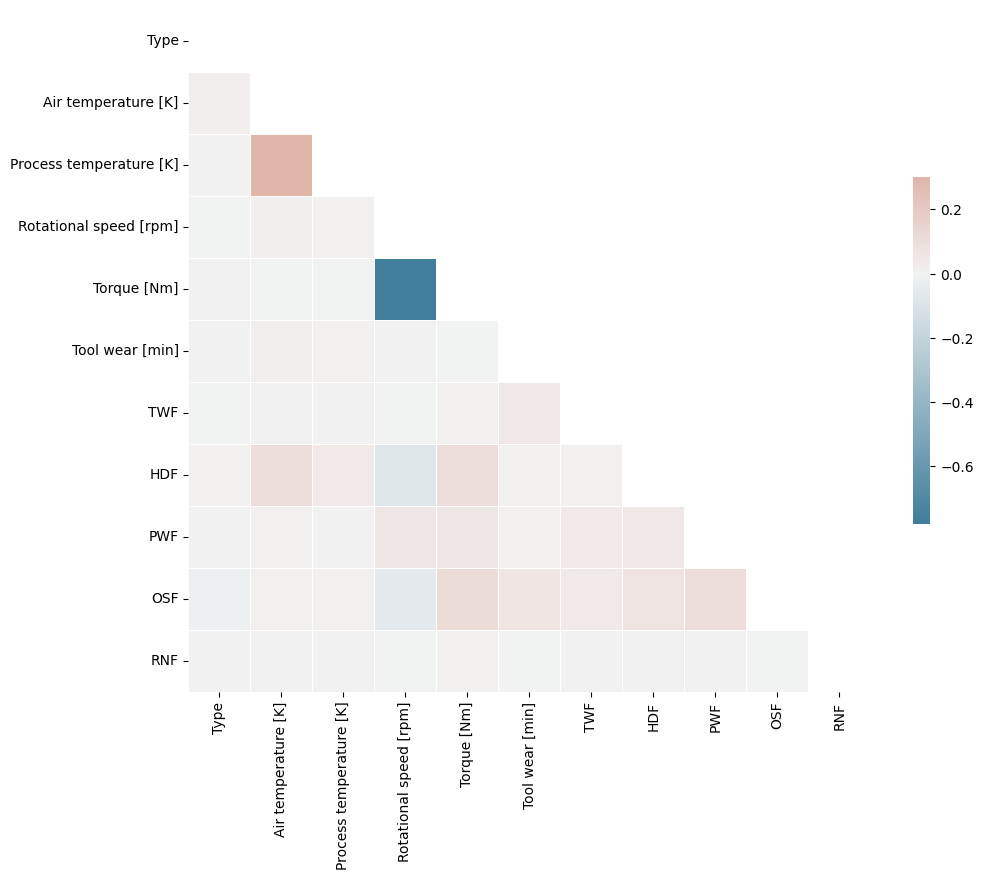

In [ ]:

# Select the columns to include in the correlation plot
cols = ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
df = df[cols]

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
# Select the relevant columns for clustering and machine failure prediction
X_cluster = df2[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
X_predict = df2[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
y_predict = df2['Machine failure']

# Define the parameter grid for KNN
knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn_n_iter = 10  # Set the desired value for n_iter

# Perform randomized search for KNN
knn_random = RandomizedSearchCV(KNeighborsClassifier(), knn_param_grid, n_jobs=2, n_iter=knn_n_iter)
knn_random.fit(X_cluster, X_predict)

# Get the best KNN model from the randomized search
best_knn = knn_random.best_estimator_

# Define the parameter grid for Logistic Regression
logreg_param_grid = {'C': [0.1, 1, 10]}
logreg_n_iter = 10  # Set the desired value for n_iter

# Perform randomized search for Logistic Regression
logreg_random = RandomizedSearchCV(LogisticRegression(), logreg_param_grid, n_jobs=2, n_iter=logreg_n_iter)
logreg_random.fit(X_cluster, y_predict)

# Get the best Logistic Regression model from the randomized search
best_logreg = logreg_random.best_estimator_

# Modify the base_estimators list to include LogisticRegression
base_estimators = [
    ('base_estimator_1', DecisionTreeClassifier(max_depth=2)),
    ('base_estimator_2', RandomForestClassifier()),
    ('base_estimator_3', GradientBoostingClassifier()),
    ('base_estimator_4', SVC(probability=True)),  # SVC with probability=True supports predict_proba
    ('base_estimator_5', LogisticRegression())  # Add LogisticRegression as a base estimator
]
# Create the ensemble model using AdaBoostClassifier with the VotingClassifier as the base estimator
ensemble_model = AdaBoostClassifier(base_estimator=VotingClassifier(estimators=base_estimators), n_estimators=50, algorithm='SAMME')

# Apply feature scaling
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Apply data augmentation using SMOTE
oversampler = SMOTE()
X_cluster_augmented, y_predict_augmented = oversampler.fit_resample(X_cluster_scaled, y_predict)

# Fit the ensemble model with the augmented training data
ensemble_model.fit(X_cluster_augmented, y_predict_augmented)

# Evaluate the ensemble model using cross-validation
accuracy = cross_val_score(ensemble_model, X_cluster_scaled, y_predict, cv=5, n_jobs=2).mean()

print("Accuracy:", accuracy)

NameError: ignored

In [ ]:
test=pd.read_csv(r'C:\Users\user\Downloads\test.csv\test.csv')
test['Type']=test['Type'].replace({'H': 1, 'L': 2, 'M': 3 })
test

In [ ]:
# Select the relevant columns for prediction
X_test = test[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]

# Predict machine failure using the ensemble model
predictions = ensemble_model.predict(X_test)

# Create a DataFrame with the id and Machine failure predictions
results = pd.DataFrame({'id': test['id'], 'Machine failure': predictions})

# Save the predictions to a CSV file
file_path = r"C:\Users\user\Downloads\train.csv~1\predictions.csv"
results.to_csv(file_path, index=False)

In [ ]:
results